# In this session we will take help of Googles Mobilenet V2 Model - Trained with 1.4 Mil images, 1000 classes to predict Our Flowers Daaset

# *We will Freeze all the other model layers except the last layer(softmax layer) so thet all the weights in the Frozen layers does't change*

In [53]:
# Libraries
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Importing Feature Extractor Model

In [55]:
IMAGE_SHAPE =(224, 224)
# # Getting the pretrained model without last layer
# feature_extractor_model = "https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector/4?tfhub-redirect=true"
# mobilenet_v2 = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)   # "trainable=False" means Freeze
# Load the pre-trained MobileNetV2 model
mobilenet_v2 = MobileNetV2(weights='imagenet')

In [56]:
# Adding the last Layer
model = tf.keras.Sequential([
    mobilenet_v2,
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Downloading Flowers Dataset

In [57]:
# Downloading flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# Directory name = 'flower_photos', destination = 'cache_dir', to unzip the zip file = 'untar=True'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
data_dir

'.\\datasets\\flower_photos'

In [58]:
import pathlib
# Going through each images and converting them into numpy array using the help of pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [59]:
# list(data_dir.glob('*/*.jpg'))  # List of All the images path with .jpg
images_count = len(list(data_dir.glob('*/*.jpg')))
images_count

3670

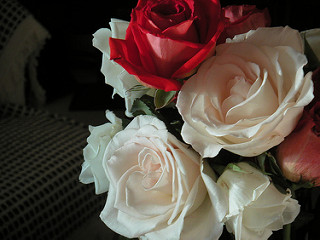

In [60]:
roses = list(data_dir.glob('roses/*'))
Image.open(str(roses[1]))

In [61]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandeline': list(data_dir.glob('dandeline/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandeline': 2,
    'sunflowers': 3,
    'tulips': 4
}

# Images to opencv

In [62]:
x, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [63]:
x = np.array(x)
y = np.array(y)

# Training & Testing Data

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2217, 224, 224, 3), (555, 224, 224, 3), (2217,), (555,))

# Scalling Data

In [65]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

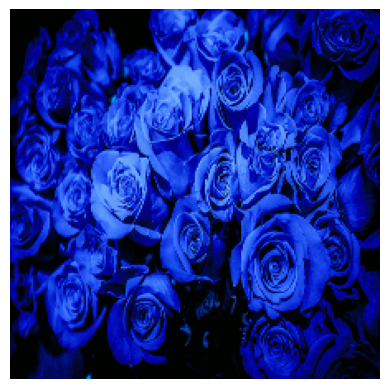

In [66]:
plt.axis('off')
plt.imshow(x[2])

# Pretrained Model Prediction

In [67]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5


c:\Users\User\OneDrive\Desktop\Python\Lib\site-packages\keras\src\backend\tensorflow\nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


70/70 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.6312 - loss: 1.5516
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.6628 - loss: 1.4510
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.5938 - loss: 1.3939
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.5938 - loss: 1.3219
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.6053 - loss: 1.2673


In [69]:
model.evaluate(x_test_scaled, y_test)

c:\Users\User\OneDrive\Desktop\Python\Lib\site-packages\keras\src\backend\tensorflow\nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 553ms/step - accuracy: 0.2414 - loss: 1.5598


[1.556935429573059, 0.24684683978557587]